In [4]:
from sklearn.neighbors import NearestNeighbors,KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [5]:
def health_smoothing(df,health,cols,rad=10): #make smoothed column; see R2 plotter for details
    X=df[cols]
    y=df[health]
    knn= KNeighborsRegressor(n_neighbors=rad).fit(X,y)  
    Y=knn.predict(X)
    df[health+'-smooth']=Y
    return df


In [7]:
df_main=pd.read_csv("../data/normalized-health-and-environmental-train.csv") #training data
df=health_smoothing(df_main,'no-asthma',['density'],300) #make smoothed column


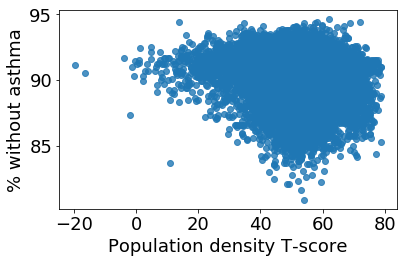

[[ 1.         -0.15325517]
 [-0.15325517  1.        ]]


<Figure size 432x288 with 0 Axes>

In [9]:
plt.rcParams.update({'font.size': 18}) #increase font size for slides
X=df['density']
Y=df['no-asthma']
 

#make plot of density verse asthma (naive model)
plt.scatter( X,Y, marker= 'o', alpha=0.8)

plt.xlabel('Population density T-score')
plt.ylabel('% without asthma')
plt.tight_layout()
plt.savefig("../visualization/plots/density-vs-no-asthma.png")
plt.show()
plt.clf()
print(np.corrcoef(X,Y)) #check correlation coief


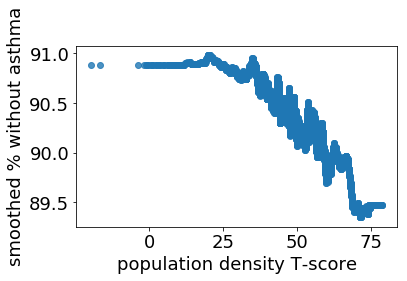

[[ 1.         -0.90735942]
 [-0.90735942  1.        ]]


In [14]:
#make plot of density verse smooth asthma (better model)
plt.rcParams.update({'font.size': 18})
X=df['density']
Y=df['no-asthma-smooth']
 

plt.scatter( X,Y, marker= 'o', alpha=0.8)

plt.xlabel('population density T-score')
plt.ylabel('smoothed % without asthma')
plt.tight_layout()
plt.savefig("../visualization/plots/density-vs-smooth-no-asthma.png")
plt.show()
print(np.corrcoef(X,Y)) 

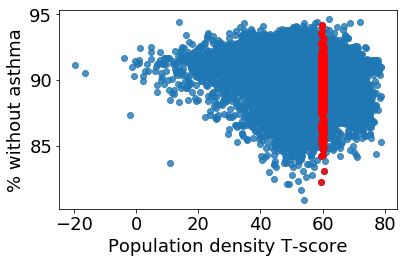

In [12]:
knn=NearestNeighbors(n_neighbors=300).fit(df[['density']]) #get 300 nearest neighbors for 60
L=knn.kneighbors([[60]])

#find index of data point with density 60
df['dist']=abs(df['density']-60)
n=df['dist'].idxmin()


#illustrate points which will be averaged
plt.rcParams.update({'font.size': 18})
X=df['density']
Y=df['no-asthma']
W=[df.loc[i,'density'] for i in L[1]] #density values for neighbors
Z=[df.loc[i,'no-asthma'] for i in L[1]] #asthma values for neighbors
    

plt.scatter( X,Y, marker= 'o', alpha=0.8)
plt.scatter(W,Z,marker='o',alpha=.8,c='red') #points which will be averaged
plt.xlabel('Population density T-score')
plt.ylabel('% without asthma')
plt.tight_layout()
plt.savefig("../visualization/plots/density-vs-no-asthma-neighbors.png")
plt.show()

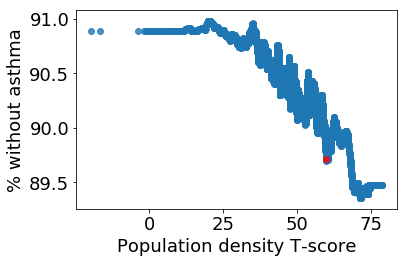

In [13]:
plt.rcParams.update({'font.size': 18})
X=df['density']
Y=df['no-asthma-smooth']

W=[df.loc[n,'density']] #density value fof data point
Z=[df.loc[n,'no-asthma-smooth']] #smoothed asthma value

plt.scatter( X,Y, marker= 'o', alpha=0.8)
plt.scatter(W,Z,marker='o',alpha=.8,c='red') #point that is the average
plt.xlabel('Population density T-score')
plt.ylabel('% without asthma')
plt.tight_layout()
plt.savefig("../visualization/plots/density-vs-smooth-no-asthma-neighbors.png")
plt.show()
   